In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

In [13]:
def calculate_cnr(image, bg, roi):
    """
    Calculate the contrast-to-noise ratio (CNR) of an image.

    Parameters
    ----------
    image : ndarray
        The image data.
    bg : ndarray
        The background data.
    roi : tuple
        The region of interest (x0, y0, x1, y1).

    Returns
    -------
    float
        The CNR.
    """
    
    # Calculate the mean and standard deviation of the image and background
    image_mean = np.mean(image[roi[1]:roi[3], roi[0]:roi[2]])
    image_std = np.std(image[roi[1]:roi[3], roi[0]:roi[2]])

    bg_mean = np.mean(bg)
    bg_std = np.std(bg)
    
    # Calculate the CNR
    cnr = 10 * np.log((np.abs(image_mean - bg_mean)) / np.sqrt(0.5*(image_std**2) + (bg_std**2)))
    
    return cnr

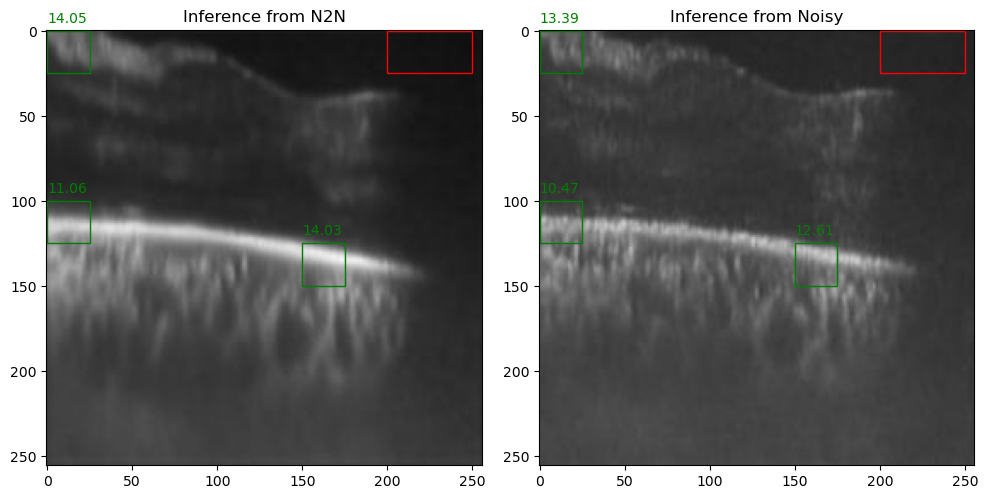

In [49]:
infer_from_n2n = Image.open('inference_from_N2N_25_5_24.jpg')
infer_from_n2n = np.array(infer_from_n2n)

infer_from_noisy = Image.open('inference_from_noisy_25_5_24.jpg')
infer_from_noisy = np.array(infer_from_noisy)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

background_roi = (200, 0, 250, 25)

roi1 = (0, 0, 25, 25)
roi2 = (0, 100, 25, 125)
roi3 = (150, 125, 175, 150)

# first image
ax[0].imshow(infer_from_n2n)
ax[0].set_title('Inference from N2N')
# Draw the background ROI
rect = Rectangle((background_roi[0], background_roi[1]), background_roi[2]-background_roi[0], background_roi[3]-background_roi[1], edgecolor='r', facecolor='none')
ax[0].add_patch(rect)
# Draw the ROIs
rect = Rectangle((roi1[0], roi1[1]), roi1[2]-roi1[0], roi1[3]-roi1[1], edgecolor='g', facecolor='none')
ax[0].add_patch(rect)
rect = Rectangle((roi2[0], roi2[1]), roi2[2]-roi2[0], roi2[3]-roi2[1], edgecolor='g', facecolor='none')
ax[0].add_patch(rect)
rect = Rectangle((roi3[0], roi3[1]), roi3[2]-roi3[0], roi3[3]-roi3[1], edgecolor='g', facecolor='none')
ax[0].add_patch(rect)

plt.subplot(1, 2, 1)
# Calculate the CNR for the first image
cnr1 = calculate_cnr(infer_from_n2n, infer_from_n2n[background_roi[1]:background_roi[3], background_roi[0]:background_roi[2]], roi1)
cnr2 = calculate_cnr(infer_from_n2n, infer_from_n2n[background_roi[1]:background_roi[3], background_roi[0]:background_roi[2]], roi2)
cnr3 = calculate_cnr(infer_from_n2n, infer_from_n2n[background_roi[1]:background_roi[3], background_roi[0]:background_roi[2]], roi3)
plt.text(roi1[0], roi1[1]-5, f'{cnr1:.2f}', color='g')
plt.text(roi2[0], roi2[1]-5, f'{cnr2:.2f}', color='g')
plt.text(roi3[0], roi3[1]-5, f'{cnr3:.2f}', color='g')



# second image
ax[1].imshow(infer_from_noisy)
ax[1].set_title('Inference from Noisy')
# Draw the background ROI
rect = Rectangle((background_roi[0], background_roi[1]), background_roi[2]-background_roi[0], background_roi[3]-background_roi[1], edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

# Draw the ROIs
rect = Rectangle((roi1[0], roi1[1]), roi1[2]-roi1[0], roi1[3]-roi1[1], edgecolor='g', facecolor='none')
ax[1].add_patch(rect)
rect = Rectangle((roi2[0], roi2[1]), roi2[2]-roi2[0], roi2[3]-roi2[1], edgecolor='g', facecolor='none')
ax[1].add_patch(rect)
rect = Rectangle((roi3[0], roi3[1]), roi3[2]-roi3[0], roi3[3]-roi3[1], edgecolor='g', facecolor='none')
ax[1].add_patch(rect)

plt.subplot(1, 2, 2)
# Calculate the CNR for the second image
cnr1 = calculate_cnr(infer_from_noisy, infer_from_noisy[background_roi[1]:background_roi[3], background_roi[0]:background_roi[2]], roi1)
cnr2 = calculate_cnr(infer_from_noisy, infer_from_noisy[background_roi[1]:background_roi[3], background_roi[0]:background_roi[2]], roi2)
cnr3 = calculate_cnr(infer_from_noisy, infer_from_noisy[background_roi[1]:background_roi[3], background_roi[0]:background_roi[2]], roi3)
plt.text(roi1[0], roi1[1]-5, f'{cnr1:.2f}', color='g')
plt.text(roi2[0], roi2[1]-5, f'{cnr2:.2f}', color='g')
plt.text(roi3[0], roi3[1]-5, f'{cnr3:.2f}', color='g')

plt.tight_layout()



plt.show()